In [2]:
# importing necessaty libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visulaization library
from scipy.stats import trim_mean
import wquantiles # used to calculate the wighted quantiles
from statsmodels import robust # for calculating the mean absolute deviaition

In [3]:
df = pd.read_excel("C:\\Users\\sageo\\OneDrive\\Desktop\\machine learning\\classgrades.xlsx")

In [4]:
df

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56


In [5]:
df.shape

(99, 6)

In [6]:
df.columns

Index(['Prefix', 'Assignment', 'Tutorial', 'Midterm', 'TakeHome', 'Final'], dtype='object')

In [7]:
df.describe()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
count,99.000000,99.000000,99.000000,99.000000,98.000000,96.000000
mean,7.313131,85.491717,89.731111,68.049495,80.828469,68.414375
std,0.932918,12.597694,15.071556,19.376074,23.808806,18.801087
min,4.000000,28.140000,34.090000,28.120000,16.910000,28.060000
25%,7.000000,80.875000,83.350000,52.810000,66.015000,53.122500
50%,8.000000,89.940000,93.100000,69.380000,87.960000,66.250000
75%,8.000000,95.000000,100.550000,82.810000,98.747500,84.167500
max,8.000000,100.830000,112.580000,110.000000,108.890000,108.890000


In [8]:
df.isna().any()

Prefix        False
Assignment    False
Tutorial      False
Midterm       False
TakeHome       True
Final          True
dtype: bool

In [9]:
df.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
TakeHome      1
Final         3
dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'Prefix'),
  Text(1.5, 0, 'Assignment'),
  Text(2.5, 0, 'Tutorial'),
  Text(3.5, 0, 'Midterm'),
  Text(4.5, 0, 'TakeHome'),
  Text(5.5, 0, 'Final')])

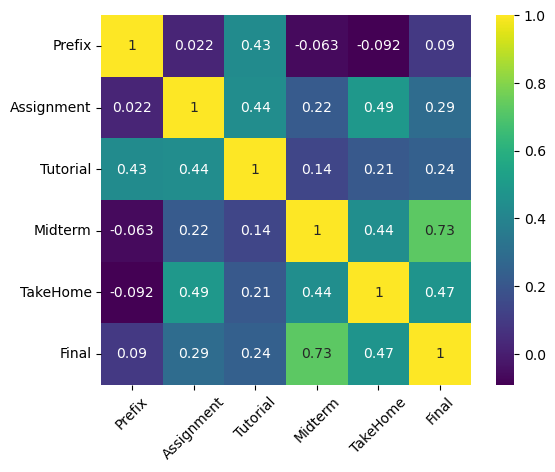

In [10]:
correlation = df.corr()
sns.heatmap(data = correlation, annot=True, square = True, cmap = 'viridis')
plt.yticks(rotation=0)
plt.xticks(rotation=45)

- Theres a correlation between midterm and final (0.725121).
- Prefix have a correlation with tutorial

In [11]:
df.corr()

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
Prefix,1.000000,0.022476,0.431078,-0.062544,-0.091668,0.090255
Assignment,0.022476,1.000000,0.440115,0.215868,0.492297,0.291232
Tutorial,0.431078,0.440115,1.000000,0.135597,0.209513,0.240551
Midterm,-0.062544,0.215868,0.135597,1.000000,0.442408,0.725121
TakeHome,-0.091668,0.492297,0.209513,0.442408,1.000000,0.474231
Final,0.090255,0.291232,0.240551,0.725121,0.474231,1.000000


# Midterm Conclusion
<br>
- Normally(almost) distributed<br>
- No outliers<br>
- No missing values

In [16]:
df["Midterm"].describe()

count     99.000000
mean      68.049495
std       19.376074
min       28.120000
25%       52.810000
50%       69.380000
75%       82.810000
max      110.000000
Name: Midterm, dtype: float64

<Axes: ylabel='Frequency'>

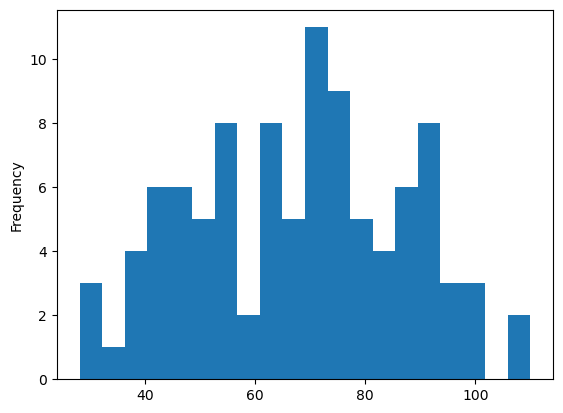

In [12]:
df['Midterm'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

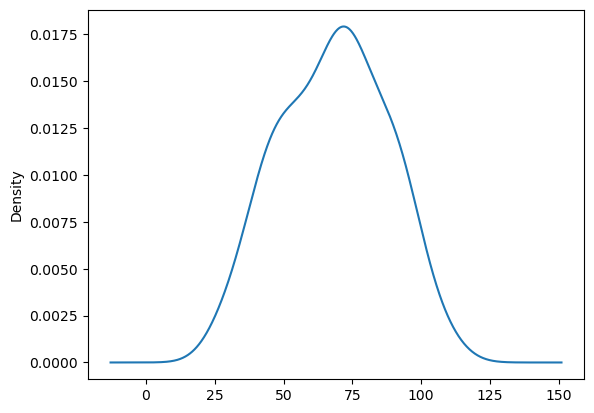

In [13]:
df['Midterm'].plot(kind='kde')

C:\Users\sageo\AppData\Local\Temp\ipykernel_22780\1021895860.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Midterm'])


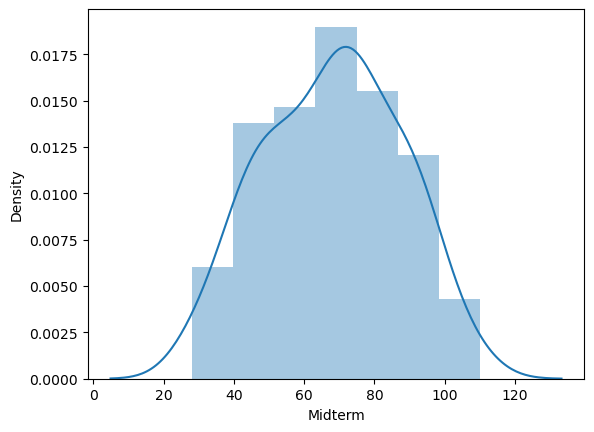

In [19]:
sns.distplot(df['Midterm'])
plt.show()

In [15]:
df['Midterm'].skew()

-0.0634576355118871

<Axes: >

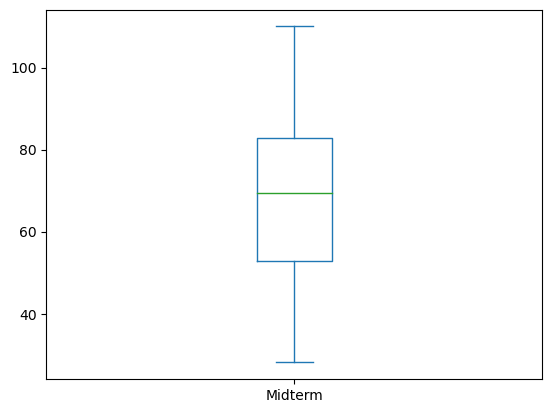

In [17]:
df['Midterm'].plot(kind='box')

In [20]:
df['Midterm'].isnull().sum()

0

In [21]:
df[df['Midterm']>99]

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
33,7,98.58,91.03,101.25,104.26,107.78
41,7,95.14,82.67,110.00,89.81,90.83
52,7,95.14,94.01,99.38,100.00,95.00
68,7,100.83,105.57,101.25,104.44,108.89
75,7,93.83,102.19,106.25,94.44,102.78


# Assignment Conclusion
<br>
- Have negative skewness<br>
- No missing values<br>
- Have outliers

In [22]:
df['Assignment'].describe()

count     99.000000
mean      85.491717
std       12.597694
min       28.140000
25%       80.875000
50%       89.940000
75%       95.000000
max      100.830000
Name: Assignment, dtype: float64

C:\Users\sageo\AppData\Local\Temp\ipykernel_22780\2181829225.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Assignment'])


<Axes: xlabel='Assignment', ylabel='Density'>

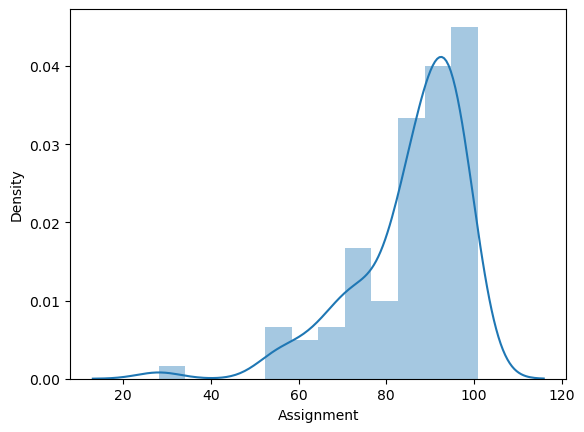

In [24]:
sns.distplot(df['Assignment'])

In [25]:
df['Assignment'].skew()

-1.6766094334941783

<Axes: >

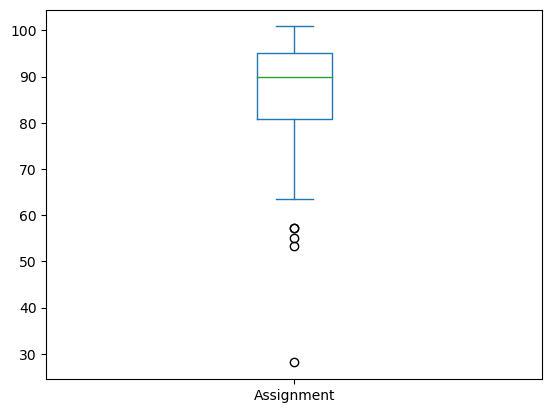

In [26]:
df['Assignment'].plot(kind='box')

In [28]:
df[df['Assignment']<60]

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
18,8,55.14,81.85,75.00,56.11,62.50
24,7,53.36,82.01,74.38,102.59,56.39
40,6,28.14,58.51,72.50,53.70,68.33
44,6,57.14,34.09,66.88,51.48,55.83


In [29]:
df['Assignment'].isnull().sum()

0

In [30]:
filter = df['Assignment'].values>60
df_outlier_rem = df[filter]
df_outlier_rem

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56


# Tutorial Conclusion 

In [31]:
df["Tutorial"].describe()

count     99.000000
mean      89.731111
std       15.071556
min       34.090000
25%       83.350000
50%       93.100000
75%      100.550000
max      112.580000
Name: Tutorial, dtype: float64

C:\Users\sageo\AppData\Local\Temp\ipykernel_22780\2168700762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Tutorial'])


<Axes: xlabel='Tutorial', ylabel='Density'>

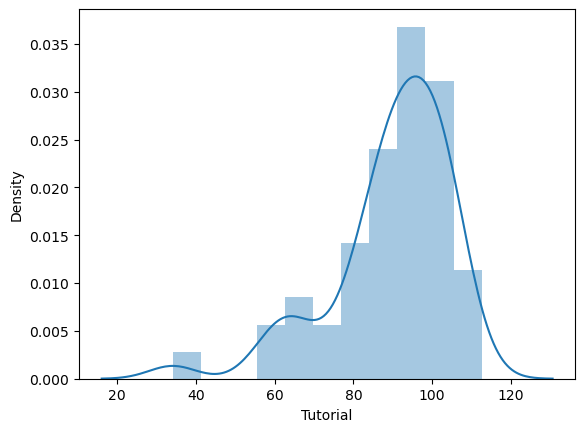

In [32]:
sns.distplot(df['Tutorial'])

In [33]:
df['Tutorial'].skew()

-1.4723303065345654

<Axes: >

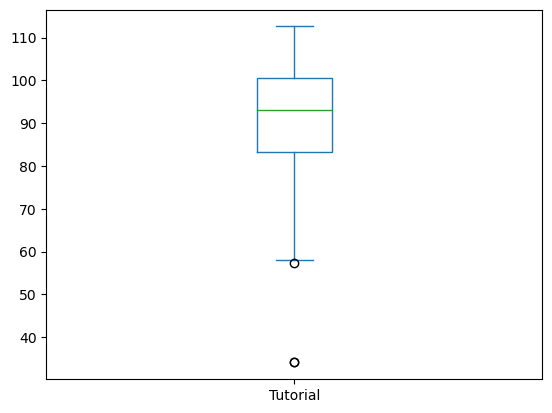

In [34]:
df['Tutorial'].plot(kind='box')

In [35]:
df[df['Tutorial']<60]

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
37,7,89.89,57.97,32.50,85.19,51.67
40,6,28.14,58.51,72.50,53.70,68.33
44,6,57.14,34.09,66.88,51.48,55.83
45,7,93.83,57.32,28.12,77.96,45.56


In [36]:
df

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,30.00,63.15,48.89
3,7,81.22,96.06,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
...,...,...,...,...,...,...
94,8,96.73,103.71,45.00,93.52,61.94
95,7,85.34,80.54,41.25,93.70,39.72
96,8,89.94,102.77,87.50,90.74,87.78
97,7,95.60,76.13,66.25,99.81,85.56


In [41]:
av = (df['Assignment']+df['Tutorial']+df['Midterm']+df['TakeHome']/4)==df['Final']
av

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool

In [53]:
df.iloc[0,4]

51.48

In [62]:
a=0
for i in range(len(df)):
    if (df.iloc[a,1]+df.iloc[a,2]+df.iloc[a,3]+df.iloc[a,4])/4 == df.iloc[a,5]:
        print('True')
    else:
        print('False')
    a+=1


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [58]:
(df.iloc[a,1]+df.iloc[a,2]+df.iloc[a,3]+df.iloc[a,4])/4 == df.iloc[a,5]

False

In [60]:
len(df)+1

100

In [64]:
lst = []
a=0
for i in range(len(df)):
    if (df.iloc[a,1]+df.iloc[a,2]+df.iloc[a,3]+df.iloc[a,4])/4 == df.iloc[a,5]:
        lst.append(True)
    else:
        lst.append(False)
    a+=1
sr = pd.Series(lst)
sr

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool